In [3]:
import scipy.io
import matplotlib.pyplot as plt
from scipy.special import expit
import numpy as np
%matplotlib inline

In [4]:

mat = scipy.io.loadmat('ejemplo_regresion.mat')
x = mat.get('x')
y = mat.get('y')
t = mat.get('t')
consumo_mat = scipy.io.loadmat('consumoDB.mat')
hrsignal_mat = scipy.io.loadmat('HRsignal.mat')

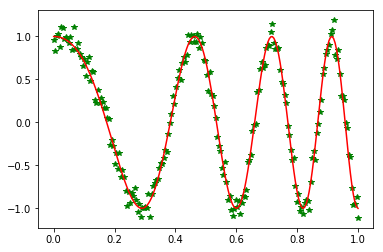

In [5]:
plt.figure
plt.plot(x, t, '*g')
plt.plot(x, y, '-r')

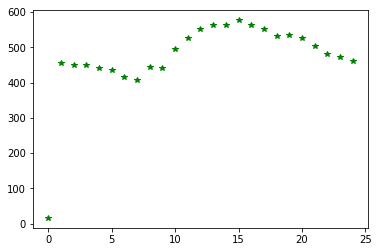

In [6]:
consumo_x = consumo_mat.get('x')
consumo_t = consumo_mat.get('t')
plt.figure
plt.plot(consumo_x, consumo_t, '*g')

In [167]:
M = 18

In [266]:
def BFunction(xi, M, Fbase):
    phiXn = np.zeros(M)
    idP = np.linspace(0, M - 1, M)
    if(Fbase == 'poly'):
        phiXn = np.power(xi, idP)
    if(Fbase == 'rbf'):
        phiXn = np.power(xi, idP)
    if(Fbase == 'sigmod'):
        #fixed s 
        s = 2
        a = (xi - idP) / s
        phiXn = expit(a)
    return phiXn

def MBFunction(x_vect, M, Fbase):
    N = np.size(x_vect)
    PHIX = np.zeros([N,M])
    for i in range(0,N):
        PHIX[i,:] = BFunction(x_vect[i],M,Fbase)
    return PHIX

def calcYEst(mPHIX, t):
    mPHIXT = mPHIX.T
    mPHIXT_pw2_inv = np.linalg.inv(mPHIXT@mPHIX)
    w_ml = mPHIXT_pw2_inv@(mPHIXT@t)
    return mPHIX.dot(w_ml)

In [269]:
M=11
mPHIX = MBFunction(consumo_x, M, 'poly')
yEst = calcYEst(mPHIX, consumo_t)

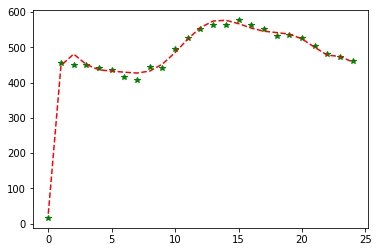

In [270]:
plt.plot(consumo_x, consumo_t, '*g')
plt.plot(consumo_x, yEst, '--r')

In [243]:
M=18
mPHIX = MBFunction(consumo_x, M, 'sigmod')
yEst = calcYEst(mPHIX, consumo_t)

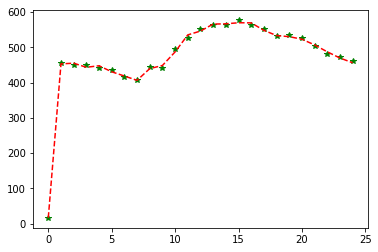

In [235]:
plt.plot(consumo_x, consumo_t, '*g')
plt.plot(consumo_x, yEst, '--r')